In [4]:
# Example of TensorFlow library
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# declare two symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression using the add function
add = tf.add(a, b)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)

4.0


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# Load the dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
# Define and Compile
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4198 - loss: 14.3025
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5037 - loss: 3.1698
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5767 - loss: 2.1557
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 1.4892
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6096 - loss: 1.4321
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6785 - loss: 1.0370
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 1.0208
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6697 - loss: 1.0873
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 1.0420
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6768 - loss: 0.8603
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6403 - loss: 1.0591
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [3]:
from keras.datasets import cifar10
from keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 478s 3us/step


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


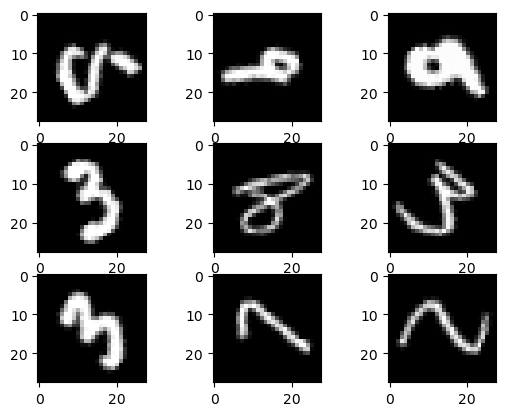

In [5]:
# Random Rotations
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3 * 3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break